enter coefficient of x^3: 1
enter coefficient of x^2: 1
enter coefficent of x: -17
enter constant: 15
enter coefficeint of x: -9
enter constant: 27


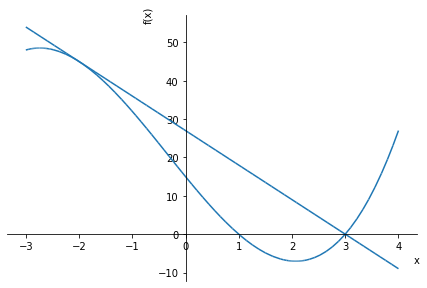

enter volume of pathway: 449.236
enter maximum hours to fill up aquarium: 24
No it will not fill up within the time frame


In [4]:
import sympy as sym

x = sym.Symbol("x")
b = sym.Symbol("b")
c = sym.Symbol("c")
d = sym.Symbol("d")

def GetCubic():
    x3coeff = int(input("enter coefficient of x^3: "))
    x2coeff = int(input("enter coefficient of x^2: "))
    x1coeff = int(input("enter coefficent of x: "))
    x0coeff = int(input("enter constant: "))
    cub_list = [x3coeff, x2coeff, x1coeff, x0coeff]
    return(cub_list)

def GetLinear():
    m = int(input("enter coefficeint of x: "))
    n = int(input("enter constant: "))
    lin_list = [m, n]
    return(lin_list)

def SolveFuncs(cub, lin):
    
    Cubic = (cub[0] * x**3) + (cub[1] * x**2) + (cub[2] * x) + (cub[3])
    StraightLine = lin[0] * x + lin[1]
    equation = sym.Eq(lhs = Cubic, rhs = StraightLine)
    solutions = sym.solveset(equation)
    sol_list = [Cubic, StraightLine, equation, solutions]
    return(sol_list)

def PlotFuncs(sol):
    solutions = sym.solveset(sol[2])
    from sympy.plotting import plot 
    if len(solutions) == 1:
        print("The area enclosed is infinite therefore there is no valid solution")
    elif len(solutions) == 2:
        plot(sol[0], sol[1], (x, ((sol[3].args[0])-1),((sol[3].args[1])+1)))
    else:
        plot(sol[0], sol[1], (x, ((sol[3].args[0])-1),((sol[3].args[2])+1)))
        
def GetVolume(sol):
    expression = sol[1] - sol[0]
    pi = sym.pi
    Volume = pi*(expression**2)
    vol_list = [expression, Volume]
    return(vol_list)
        
def GetArea(sol, vol):
    if len(sol[3]) == 2:
        totalArea = abs(sym.integrate(vol[1], (x , sol[3].args[0], sol[3].args[1])))
    elif len(sol[3]) == 3:
        totalArea = abs(sym.integrate(vol[0], (x , sol[3].args[0], sol[3].args[1])))
        totalArea = totalArea + abs(sym.integrate(vol[0], (x , sol[3].args[1], sol[3].args[2])))
    wholeVolume = round(totalArea, 3)
    are_list = [wholeVolume]
    return(are_list)

def AquariumModel(are):
    Tube = float(input("enter volume of pathway: "))
    Aquarium = round(are[0] - Tube,3)
    TimeHours = int(input("enter maximum hours to fill up aquarium: "))
    TimeMinutes = 60*TimeHours
    Rate = round(Aquarium/TimeMinutes,3)
    if Rate > 0.9:
        print("No it will not fill up within the time frame")
    if Rate <= 0.9:
        print("Yes it will fill up within the time frame")
    
def Main():
    a = GetCubic()
    b = GetLinear()
    c = SolveFuncs(a, b)
    d = PlotFuncs(c)
    e = GetVolume(c)
    f = GetArea(c, e)
    g = AquariumModel(f)
    
Main()

# 